# Graph Construction

## Imports

In [54]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd

## Load Scraped Chat

In [55]:
df = pd.read_csv("../slack-scraper/outputs/scraped_file_20240518_084607.csv")
df

,image_link,sender_id,sender_name,timestamp,information
0,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"<div role=""presentation"" class=""c-message_kit_..."
1,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"<div role=""presentation"" class=""c-message_kit_..."
2,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"<div role=""presentation"" class=""c-message_kit_..."
3,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"<div role=""presentation"" class=""c-message_kit_..."
4,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"<div role=""presentation"" class=""c-message_kit_..."
...,...,...,...,...,...
490,https://ca.slack-edge.com/T013F4Z825N-U0729FZB...,U0729FZBXR8,Emily Okafor,19:40,"<div role=""presentation"" class=""c-message_kit_..."
491,https://ca.slack-edge.com/T013F4Z825N-U0729MD8...,U0729MD8YR0,Valeria Lee,19:11,"<div role=""presentation"" class=""c-message_kit_..."
492,https://ca.slack-edge.com/T013F4Z825N-U0726FUB...,U0726FUBUHK,Ernest Pough,18:20,"<div role=""presentation"" class=""c-message_kit_..."
493,https://ca.slack-edge.com/T013F4Z825N-U0726FUB...,U0726FUBUHK,Ernest Pough,18:20,"<div role=""presentation"" class=""c-message_kit_..."


Removing failed files

In [56]:
removal = []
for _, row in df.iterrows():
    if "404" in str(row.to_dict()):
        print(_, "=", row.to_dict())
        removal.append(_)

missed = list(set(df.iloc[removal, :].sender_name.to_list()))
count_dict = df.sender_name.value_counts().to_dict()

for miss in missed:
    print(miss, count_dict[miss])


df.iloc[removal, :]

478 = {'image_link': '404', 'sender_id': '404', 'sender_name': '404', 'timestamp': nan, 'information': '<div role="presentation" class="c-message_kit__gutter__right" data-qa="message_content"><span id="primary-C01KHTU034Y-1715094984.373779-sender" class="offscreen" aria-hidden="true" data-qa="aria-labelledby-primary-C01KHTU034Y-1715094984.373779-sender">Rushika Thandra</span><div class="c-message_kit__blocks c-message_kit__blocks--rich_text"><div class="c-message__message_blocks c-message__message_blocks--rich_text" data-qa="message-text"><div class="p-block_kit_renderer" data-qa="block-kit-renderer"><div class="p-block_kit_renderer__block_wrapper p-block_kit_renderer__block_wrapper--first"><div class="p-rich_text_block" dir="auto"><div class="p-rich_text_section">connect with me on LinkedIn <a target="_blank" class="c-link" data-stringify-link="https://www.linkedin.com/in/rushikathandra/" delay="150" data-sk="tooltip_parent" href="https://www.linkedin.com/in/rushikathandra/" rel="noop

,image_link,sender_id,sender_name,timestamp,information
478,404,404,404,NaN,"<div role=""presentation"" class=""c-message_kit_..."


In [57]:
df = df.drop_duplicates(subset=["sender_name"]).reset_index(drop=True)
df

,image_link,sender_id,sender_name,timestamp,information
0,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"<div role=""presentation"" class=""c-message_kit_..."
1,https://ca.slack-edge.com/T013F4Z825N-U073EB5R...,U073EB5RAKB,Hamede Abdulgafur,11:07,"<div role=""presentation"" class=""c-message_kit_..."
2,https://ca.slack-edge.com/T013F4Z825N-U072V2E3...,U072V2E3J3Y,Cameron Lee,08:33,"<div role=""presentation"" class=""c-message_kit_..."
3,https://ca.slack-edge.com/T013F4Z825N-U0726L9B...,U0726L9BLVB,Juliana Bakhtsizina,00:40,"<div role=""presentation"" class=""c-message_kit_..."
4,https://ca.slack-edge.com/T013F4Z825N-U0722NQS...,U0722NQS59C,Gina Castromonte,00:09,"<div role=""presentation"" class=""c-message_kit_..."
...,...,...,...,...,...
120,https://ca.slack-edge.com/T013F4Z825N-U072BRET...,U072BRETRPW,Julissa L,20:09,"<div role=""presentation"" class=""c-message_kit_..."
121,https://ca.slack-edge.com/T013F4Z825N-U0729FZB...,U0729FZBXR8,Emily Okafor,19:40,"<div role=""presentation"" class=""c-message_kit_..."
122,https://ca.slack-edge.com/T013F4Z825N-U0729MD8...,U0729MD8YR0,Valeria Lee,19:11,"<div role=""presentation"" class=""c-message_kit_..."
123,https://ca.slack-edge.com/T013F4Z825N-U0726FUB...,U0726FUBUHK,Ernest Pough,18:20,"<div role=""presentation"" class=""c-message_kit_..."


In [58]:
pd.DataFrame(df.iloc[0])

,0
image_link,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...
sender_id,U0729D9HFMY
sender_name,Amy Rodriguez
timestamp,18:58
information,"<div role=""presentation"" class=""c-message_kit_..."


Parse the HTML

In [59]:
from bs4 import BeautifulSoup

def remove_tags(html):
    res = []
    for i in html:
        # parse html content
        soup = BeautifulSoup(i)
    
        for data in soup(['style', 'script']):
            # Remove tags
            data.decompose()
        res.append(' '.join(soup.stripped_strings))
        # return data by retrieving the tag content
    return res


def get_linkedin_profile(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    message = soup.find(class_="p-rich_text_section")
    link_element = message.find('a')
    href = link_element['href'] if link_element else ''
    if href:
        return href

    return "Not provided"

def get_message(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    message = soup.find(class_="p-rich_text_section")

    if message:
        for data in soup(['style', 'script']):
            # Remove tags
            data.decompose()
        result = ' '.join(soup.stripped_strings)
        return result
    else:
        return message

df['linkedin_url'] = df.information.apply(get_linkedin_profile)
df['information'] = df.information.apply(get_message)
df

,image_link,sender_id,sender_name,timestamp,information,linkedin_url
0,https://ca.slack-edge.com/T013F4Z825N-U0729D9H...,U0729D9HFMY,Amy Rodriguez,18:58,"Amy Rodriguez Amy Rodriguez 18:58 Hello, I rea...",Not provided
1,https://ca.slack-edge.com/T013F4Z825N-U073EB5R...,U073EB5RAKB,Hamede Abdulgafur,11:07,Hamede Abdulgafur Hamede Abdulgafur 11:07 Hell...,Not provided
2,https://ca.slack-edge.com/T013F4Z825N-U072V2E3...,U072V2E3J3Y,Cameron Lee,08:33,Cameron Lee Cameron Lee 08:33 Hi everyone I'm ...,Not provided
3,https://ca.slack-edge.com/T013F4Z825N-U0726L9B...,U0726L9BLVB,Juliana Bakhtsizina,00:40,Juliana Bakhtsizina Juliana Bakhtsizina 00:40 ...,Not provided
4,https://ca.slack-edge.com/T013F4Z825N-U0722NQS...,U0722NQS59C,Gina Castromonte,00:09,Gina Castromonte Gina Castromonte 00:09 Hi Eve...,Not provided
...,...,...,...,...,...,...
120,https://ca.slack-edge.com/T013F4Z825N-U072BRET...,U072BRETRPW,Julissa L,20:09,Julissa L Julissa L 20:09 Hi everyone! My name...,https://www.linkedin.com/in/julissa-lema/
121,https://ca.slack-edge.com/T013F4Z825N-U0729FZB...,U0729FZBXR8,Emily Okafor,19:40,Emily Okafor Emily Okafor 19:40 Hi everyone! M...,https://www.linkedin.com/in/emily-okafor/
122,https://ca.slack-edge.com/T013F4Z825N-U0729MD8...,U0729MD8YR0,Valeria Lee,19:11,Valeria Lee Valeria Lee 19:11 Intro: Hello eve...,https://www.linkedin.com/in/valeriallee/
123,https://ca.slack-edge.com/T013F4Z825N-U0726FUB...,U0726FUBUHK,Ernest Pough,18:20,Ernest Pough Ernest Pough 18:20 Intro: Hey eve...,https://www.resilientcoders.org/


Here are our profiles

In [60]:
profiles = dict(zip(df.sender_name.to_list(), remove_tags(df.information.to_list())))
profiles

/var/folders/59/q2yb2fpj1h36gmjgd793x7_w0000gn/T/ipykernel_50224/4132744192.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(i)


{'Amy Rodriguez': "Amy Rodriguez Amy Rodriguez 18:58 Hello, I realized I never sent my intro I’m Amy (she/her/ella) a rising senior at the University of Michigan studying Information Sciences at the University of Michigan (Go Blue!) with a concentration in User Experience Design paired with minors in business and public policy. I’m so excited to be joining Develop for Good, this is my first time and I am so grateful for the opportunity and ability to connect with everyone on this channel! Location: Michigan DFG Role: Product Manager @Joy Education Project Hobbies: Photography/videography, vision board making, listening to music, faith, food, family, friends, and international travel! LinkedIn: https://www.linkedin.com/in/amy-herreraa/ linkedin.com Amy H. - Salesforce | LinkedIn Hello! I'm Amy Rodriguez a driven first-generation college student of Mexican immigrant parents. I am currently studying Information Sciences at the University of Michigan (Go Blue!) School of Information with a

## Cluster Profiles based on similarities

{
    "nodes": [
        {
            "id": "0",
            "isClusterNode": false,
            "name": "Amy Rodriguez",
            "profile": "Amy Rodriguez Amy Rodriguez 18:58 Hello, I realized I never sent my intro I\u2019m Amy (she/her/ella) a rising senior at the University of Michigan studying Information Sciences at the University of Michigan (Go Blue!) with a concentration in User Experience Design paired with minors in business and public policy. I\u2019m so excited to be joining Develop for Good, this is my first time and I am so grateful for the opportunity and ability to connect with everyone on this channel! Location: Michigan DFG Role: Product Manager @Joy Education Project Hobbies: Photography/videography, vision board making, listening to music, faith, food, family, friends, and international travel! LinkedIn: https://www.linkedin.com/in/amy-herreraa/ linkedin.com Amy H. - Salesforce | LinkedIn Hello! I'm Amy Rodriguez a driven first-generation college student of Mex

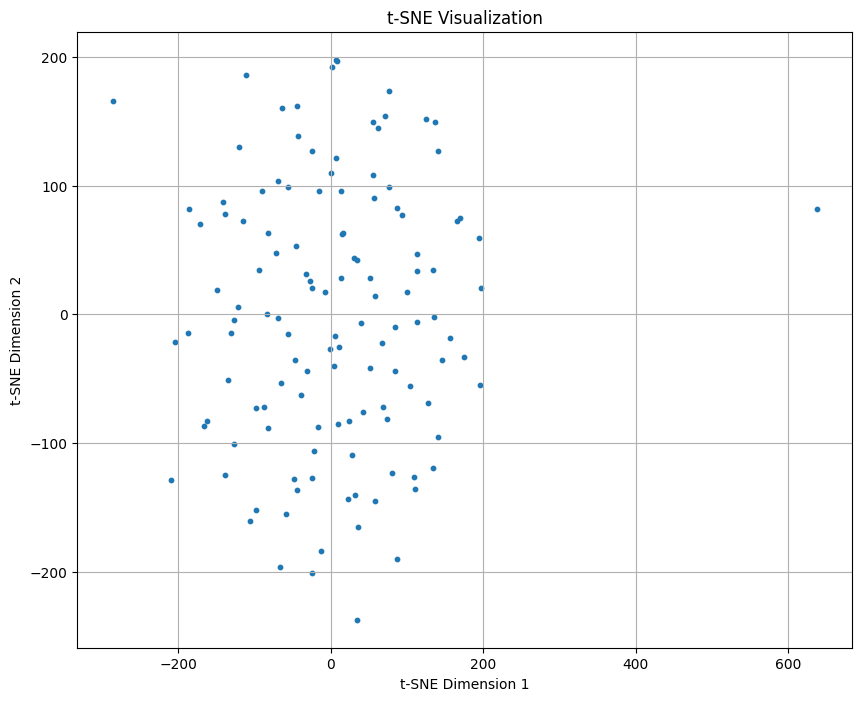

In [78]:
 # Load the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = {name: model.encode(text) for name, text in profiles.items()}

# Convert embeddings to a numpy array
embedding_list = np.array(list(embeddings.values()))

# Perform t-SNE transformation
tsne = TSNE(n_components=3, perplexity=50, learning_rate=200, random_state=42)
tsne_results = tsne.fit_transform(embedding_list)

# Normalize t-SNE results
profile_names = list(embeddings.keys())
min_vals = np.min(tsne_results, axis=0)
max_vals = np.max(tsne_results, axis=0)
normalized_tsne_results = (tsne_results - min_vals) / (max_vals - min_vals)

tsne_dict = {profile_names[i]: normalized_tsne_results[i] for i in range(len(profile_names))}

# Function to create nodes
def create_nodes(tsne_dict):
    nodes = []
    for i, (name, coords) in enumerate(tsne_dict.items()):
        node = {
            "id": str(i),
            "isClusterNode": False,
            "name": name,
            "profile": profiles[name],
            "linkedin_url": df[df.sender_name == name]['linkedin_url'].to_list()[0],
            "image": df[df.sender_name == name]['image_link'].to_list()[0],
            "size": 2,
            "x": str(int(coords[0])),
            "y": str(int(coords[1])),
            "z": str(int(coords[2]))
        }
        nodes.append(node)
    return nodes

def create_links(tsne_dict, num_neighbors=1):
    links = []
    coords_list = np.array(list(tsne_dict.values()))
    num_nodes = len(coords_list)

    for i in range(num_nodes):
        distances = np.linalg.norm(coords_list - coords_list[i], axis=1)
        nearest_indices = np.argsort(distances)[1:num_neighbors+1]

        for idx in nearest_indices:
            link = {
                "source": str(i),
                "target": str(idx)
            }
            links.append(link)

    return links


nodes = create_nodes(tsne_dict)
links = create_links(tsne_dict, num_neighbors=2)

# Result
output = {
    "nodes": nodes,
    "links": links
}

# Dump JSON to frontend folder
with open('/Users/admin/Documents/develop_for_good/frontend/src/data/data.json', 'w') as f:
    json.dump(output, f, indent=4)

print(json.dumps(output, indent=4))

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


## Extra

In [135]:
import os
import pandas as pd
import json

In [136]:
import ollama._client as client

In [5]:
text = None
with open('data3.txt', 'r') as f:
    text = f.readlines()
print(text)

['\n', '\n', '\n', 'Ernest Pough\n', '  6:20 PM\n', "Intro: Hey everyone! My name is Ernest Pough and I am a recently transitioned veteran (US Army) currently studying at Middlesex Community College majoring in Computer Science (sophomore). I am also an Alum of Resilient Coders a FREE coding bootcamp that helps underrepresented people break into tech through their full stack web development curriculum. I am always open to connect/network and if anyone is located in MA I'm always open to meet in person.\n", 'Location: Massachusetts\n', 'DFG Role: Product Manager for NeighborShare\n', 'Hobbies: Videogames, Hiking, Catching up on TV shows/animes, volunteering, and traveling\n', 'Connect w/ me: LinkedIn (edited) \n', 'linkedin.comlinkedin.com\n', 'Ernest Pough - Resilient Coders | LinkedIn\n', "I have a unique combination of military experience and software engineering expertise. As… | Learn more about Ernest Pough's work experience, education, connections & more by visiting their profile 

In [6]:
def load_df_from_slack_dump():
    df = {}
    counter = 0
    current_key = None

    for index, i in enumerate(text):
        if (('PM' in i) or ('AM' in i)) and len(i) < 20:
            current_key = text[index-1]
            df[current_key] = []
        elif current_key != None:
            df[current_key].append(i)
        counter+=1

    df = {k: [v] for (k, v) in df.items()}

    df = pd.DataFrame(df)
    df = df.T.reset_index()
    df.columns = ['Name', 'Description']
    return df

df = load_df_from_slack_dump()
df

,Name,Description
0,Ernest Pough\n,[Intro: Hey everyone! My name is Ernest Pough ...
1,Valeria Lee\n,[Intro: Hello everyone! My name is Valeria Lee...
2,Emily Okafor\n,"[Hi everyone! My name is Emily, and I'm a form..."
3,Julissa L\n,[Hi everyone! My name is Julissa and I’m curre...
4,Anna Chang\n,"[Hi everyone! My name is Anna, and I’m a maste..."
...,...,...
94,Tharun Kumar Reddy Polu\n,[Hello everyone! My name is Tharun Kumar Reddy...
95,Allyza Quiambao\n,[Hi everyone!! I'm a recent Sociology grad fro...
96,Jason jiang\n,"[Hello everyone! My name is Jason, I’m a risin..."
97,Anirudh Nistala\n,[Hey! My name’s Anirudh and I’m a rising senio...


In [18]:
df.Description[0]

["Intro: Hey everyone! My name is Ernest Pough and I am a recently transitioned veteran (US Army) currently studying at Middlesex Community College majoring in Computer Science (sophomore). I am also an Alum of Resilient Coders a FREE coding bootcamp that helps underrepresented people break into tech through their full stack web development curriculum. I am always open to connect/network and if anyone is located in MA I'm always open to meet in person.\n",
 'Location: Massachusetts\n',
 'DFG Role: Product Manager for NeighborShare\n',
 'Hobbies: Videogames, Hiking, Catching up on TV shows/animes, volunteering, and traveling\n',
 'Connect w/ me: LinkedIn (edited) \n',
 'linkedin.comlinkedin.com\n',
 'Ernest Pough - Resilient Coders | LinkedIn\n',
 "I have a unique combination of military experience and software engineering expertise. As… | Learn more about Ernest Pough's work experience, education, connections & more by visiting their profile on LinkedIn\n",
 '\n',
 '\n',
 'Valeria Lee\

In [ ]:
class GraphData:
    name=""
    description=""
    hobbies=""
    role=""
    location=""
    linkedin=""

In [54]:
import ollama

prompt = str(df.Description[6])
system_prompt = """ Generate a JSON object that contains details about a person including their name, description, hobbies, role (choose one from: Mentor, Engineer, Engineer Manager, Design Manager, Product Manager, Designer, Product Lead), project (just the name of the project and role at the project), location, and linkedin profile URL.
"""


response = ollama.generate(
  model='llama3',
  system=system_prompt,
  prompt=prompt
)

print(response['response'])

mod = "{" + response['response'].split('{')[1].split("}")[0] + "}"
d = json.loads(mod)
d

Here is the JSON object generated from the provided text:
```json
{
  "name": "Miranda Burrows",
  "description": "Hi! My name is Miranda and I am a creative and detail-oriented student studying human-centered design. I am excited to begin a career in UX or Product Design, where I can combine my creative spirit with my passion for technology.",
  "hobbies": ["watercolor painting", "going on walks"],
  "role": "Designer",
  "project": {
    "name": "Joy Education Foundation",
    "role": "DFG Role"
  },
  "location": "San Diego, California",
  "linkedinProfileURL": "https://www.linkedin.com/in/miranda-burrows?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app"
}
```
Note that I removed the unnecessary text and extracted the relevant information to create a JSON object. Let me know if you have any further requests!


JSONDecodeError: Expecting value: line 6 column 14 (char 372)

## Beautiful Soup parsing

In [137]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

def format_date(item):
    try:
        date_str = item.find(class_="c-timestamp").get('aria-label')
        
        if "Today" in date_str:
            return datetime.today()
        elif "Yesterday" in date_str:
            
            return datetime.today() - timedelta(days = 1)
        
        timestamp = datetime.strptime(date_str + " 2024", "%B %dth at %I:%M:%S %p %Y")
        return timestamp
    except:
        return None

def parse_html_content(start_date, end_date, html_content):
    parsed_data = []
    
    soup = BeautifulSoup(html_content, 'html.parser')
    label = soup.find(class_="p-view_contents p-view_contents--primary p-view_contents--channel-list-pry").get('aria-label')
    
    if label == "Channel introduce-yourself":
        items = soup.find_all(class_="c-virtual_list__item")
        
        for item in items:
            
            timestamp = format_date(item)
    
            
            if timestamp != None:
                
                if start_date <= timestamp <= end_date:
                    message = item.find(class_="p-rich_text_section")
                    name = item.find(class_="c-link--button c-message__sender_button").text
                    
                    link_element = message.find('a')
                    href = link_element['href'] if link_element else ''
                    if href == '':
                        continue
                    message_content = message.get_text(strip=True)
                    
                    parsed_data.append({
                        'date': timestamp,
                        'name': name,
                        'content': message_content,
                        'linkedin': href
                    })
        
    return parsed_data

# Example usage:
min_date = datetime(day=7, month=5, year=2024)
max_date = datetime.today()

with open('data.html', 'r') as f:
    html_content = f.read()

parsed_data = parse_html_content(min_date, max_date, html_content)
df = pd.DataFrame(parsed_data)
df
        
        

,date,name,content,linkedin
0,2024-05-16 13:07:15.416963,Feyi Ogunsanya,"Hey guys, my name is Feyi and I'm a MS Compute...",https://www.linkedin.com/in/feyi-ogunsanya-60b...


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

def format_date(item):
    date_str = item.find(class_="c-timestamp")

    if date_str == None:
        return None
    else:
        date_str = date_str.get('aria-label')

    if "Today" in date_str:
        return datetime.today()
    
    if "Yesterday" in date_str:
        return datetime.today() - timedelta(days=1)
    else:
        try:
            return datetime.strptime(date_str + " 2024", "%B %dth at %I:%M:%S %p %Y")
        except ValueError:
            return None

def parse_html_content(start_date, end_date, html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    if soup.find(class_="p-view_contents p-view_contents--primary p-view_contents--channel-list-pry").get('aria-label') != "Channel introduce-yourself":
        return []

    parsed_data = []
    for item in soup.find_all(class_="c-virtual_list__item"):
        # if "c-link--button c-message__sender_button" in str(item):
        #     print(str(item)[800:])
            
            
        timestamp = format_date(item)

        if timestamp != None and start_date <= timestamp <= end_date:
            try:
                message = item.find(class_="p-rich_text_section")
                name = item.find(class_="c-link--button c-message__sender_button").text
                link_element = message.find('a')
                href = link_element['href'] if link_element else ''
                image = item.find(class_="c-base_icon c-base_icon--image").get('src')
                if href:
                    message_content = message.get_text(strip=True)
                    parsed_data.append({
                        # 'date': timestamp,
                        'name': name,
                        'content': message_content,
                        'linkedin': href,
                        'image': image
                    })
            except:
                print(str(item)[str(item).index("""data-qa="message_content""")-100:str(item).index("""data-qa="message_content""")+300])
                continue
    return parsed_data

# Usage
min_date = datetime(day=7, month=5, year=2024)
max_date = datetime.today()

with open('tejos.html', 'r') as f:
    html_content = f.read()

parsed_data = parse_html_content(min_date, max_date, html_content)
df = pd.DataFrame(parsed_data)
df


bel" data-qa="timestamp_label">8:46</span></a></div></div><div class="c-message_kit__gutter__right" data-qa="message_content" role="presentation"><span aria-hidden="true" class="offscreen" data-qa="aria-labelledby-primary-C01KHTU034Y-1715094984.373779-sender" id="primary-C01KHTU034Y-1715094984.373779-sender">Rushika Thandra</span><div class="c-message_kit__blocks c-message_kit__blocks--rich_text">


,name,content,linkedin,image
0,Thuc Anh Vu,Hi everyone! My name is Anh Thuc (Christina) V...,http://linkedin.com/in/anh-thuc-vu-christina,https://ca.slack-edge.com/T013F4Z825N-U072Y8HH...
1,Ernest Pough,Intro: Hey everyone! My name is Ernest Pough a...,https://www.resilientcoders.org/,https://ca.slack-edge.com/T013F4Z825N-U0726FUB...
2,Valeria Lee,Intro: Hello everyone! My name is Valeria Lee ...,https://www.linkedin.com/in/valeriallee/,https://ca.slack-edge.com/T013F4Z825N-U0729MD8...
3,Emily Okafor,"Hi everyone! My name is Emily, and I'm a forme...",https://www.linkedin.com/in/emily-okafor/,https://ca.slack-edge.com/T013F4Z825N-U0729FZB...
4,Julissa L,Hi everyone! My name is Julissa and I’m curren...,https://www.linkedin.com/in/julissa-lema/,https://ca.slack-edge.com/T013F4Z825N-U072BRET...
5,Anna Chang,"Hi everyone! My name is Anna, and I’m a master...",https://www.linkedin.com/in/annauchang/,https://ca.slack-edge.com/T013F4Z825N-U071V3MB...
6,Okitta Ongaye,"Hi everyone! My name is Okitta Ongaye, and I’m...",https://www.linkedin.com/in/okitta-ongaye-5610...,https://ca.slack-edge.com/T013F4Z825N-U072YDW0...
7,Miranda Burrows,Hi everyone! My name is Miranda Burrows and I ...,https://www.linkedin.com/in/miranda-burrows?ut...,https://ca.slack-edge.com/T013F4Z825N-U072C0FP...
8,Mike Odnis,"Intro: My name is Mike Odnis, and I am an up-a...",https://www.linkedin.com/in/mikeodnis,https://ca.slack-edge.com/T013F4Z825N-U072XUP8...
9,Anya Kondamani,Hi everyone! My name is Anya Kondamani and I a...,https://www.linkedin.com/in/anyakondamani/,https://ca.slack-edge.com/T013F4Z825N-U0729G3E...
